In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from joblib import Parallel, delayed

import Dataset
import LinearClassifier

In [2]:
# Load dataset
dataset = Dataset.load_cifar()

# Linear Classifier
## Learning Rate
Experimenting with multiple learning rates and showing accuracy on test batch

In [7]:
lr_stats = pd.DataFrame()
learning_rates = [.1, .03, .01, .003, .001, .0007, .0005, .0003, .0002, .0001]

for learning_rate in learning_rates:
    print('Computing learning_rate %f' % learning_rate)
    model = LinearClassifier.LinearClassifier(10, 3072, 
                          loss_calculator=LinearClassifier.SoftmaxCalculator(),
                          learning_rate=learning_rate)
    stats = {}
    stats['learning_rate'] = learning_rate
    stats['initial_accuracy'] = model.measure_accuracy(dataset)
    model.train(dataset)
    stats['final_accuracy'] = model.measure_accuracy(dataset)
    lr_stats = lr_stats.append(stats, ignore_index=True)
print(lr_stats)

Computing learning_rate 0.100000
Computing learning_rate 0.030000
Computing learning_rate 0.010000
Computing learning_rate 0.003000
Computing learning_rate 0.001000
Computing learning_rate 0.000700
Computing learning_rate 0.000500
Computing learning_rate 0.000300
Computing learning_rate 0.000200
Computing learning_rate 0.000100
   final_accuracy  initial_accuracy  learning_rate
0          0.1071            0.1009         0.1000
1          0.1224            0.1091         0.0300
2          0.1425            0.1031         0.0100
3          0.1738            0.0800         0.0030
4          0.2624            0.0982         0.0010
5          0.2967            0.0839         0.0007
6          0.3298            0.1011         0.0005
7          0.3573            0.0998         0.0003
8          0.3574            0.0962         0.0002
9          0.3396            0.1155         0.0001


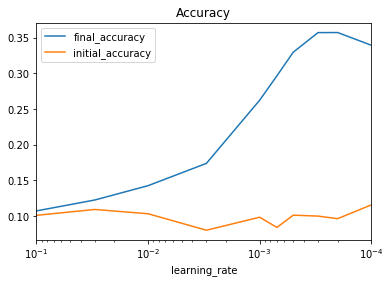

In [8]:
ax = lr_stats.plot(x='learning_rate', y='final_accuracy',
              title='Accuracy', logx=True)
lr_stats.plot(x='learning_rate', y='initial_accuracy',
              title='Accuracy', logx=True, ax=ax)

plt.xlim(max(learning_rates), min(learning_rates))
plt.show()

## Training Rounds
Experiment doing multiple rounds on the same training data
Works well for badly initialized W, less effective otherwise (because accuracy starts high already)

In [5]:

dataset = Dataset.load_cifar()
tr_stats = pd.DataFrame()
learning_rate = 0.0003
model = LinearClassifier.LinearClassifier(10, 3072, 
                      loss_calculator=LinearClassifier.SoftmaxCalculator(),
                      learning_rate=learning_rate)
for i in range(10):
    print('Round', i)
    model.train(dataset)
    tr_stats = tr_stats.append({'round' : i,
                                'accuracy' : model.measure_accuracy(dataset)},
                                ignore_index=True)
print(df_stats)

Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
   accuracy  round
0    0.3595    0.0
1    0.3704    1.0
2    0.3749    2.0
3    0.3779    3.0
4    0.3779    4.0
5    0.3802    5.0
6    0.3796    6.0
7    0.3804    7.0
8    0.3801    8.0
9    0.3811    9.0


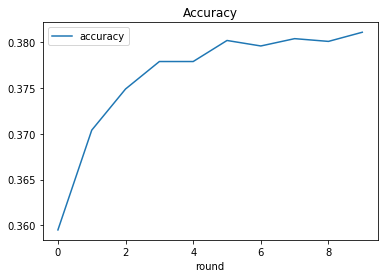

In [6]:
tr_stats.plot(x='round', y='accuracy', title='Accuracy')
plt.show()